# 이차판별분석 (QDA)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 생성

In [2]:
# 예시 데이터 생성 (공분산이 동질적이지 않음)
np.random.seed(0)
X, y = make_classification(n_samples=300, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, n_informative=2, class_sep=1.5)

# 데이터 프레임으로 변환
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Class'] = y

# 2. Box's M-test

In [4]:
from scipy.stats import chi2
from scipy.linalg import inv

def box_m_test(data, labels):
    classes = np.unique(labels)
    k = len(classes)
    
    pooled_cov = np.zeros((data.shape[1], data.shape[1]))
    for c in classes:
        class_data = data[labels == c]
        cov_matrix = np.cov(class_data, rowvar=False)
        pooled_cov += (len(class_data) - 1) * cov_matrix

    pooled_cov /= (data.shape[0] - k)

    m_stat = 0
    for c in classes:
        class_data = data[labels == c]
        class_cov = np.cov(class_data, rowvar=False)
        n = len(class_data)
        m_stat += n * np.log(np.linalg.det(class_cov) / np.linalg.det(pooled_cov))
    
    m_stat *= (data.shape[1] - 1) * (data.shape[1] + 1) / 2
    p_value = chi2.sf(m_stat, df=(k - 1) * data.shape[1] * (data.shape[1] + 1) / 2)
    
    return p_value

In [5]:
p_value = box_m_test(X, y)
print(f"Box's M-test p-value: {p_value:.4f}")

Box's M-test p-value: 1.0000


# 3. 판별분석 진행

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# QDA 수행
qda = QDA()
qda.fit(X_scaled, y)

# 예측
qda_pred = qda.predict(X_scaled)

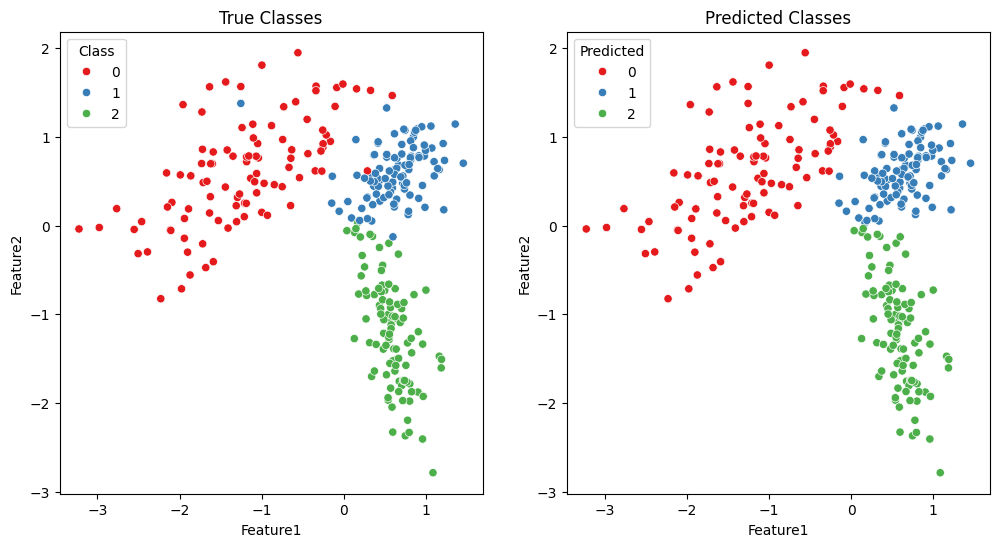

In [7]:
# QDA 결과 시각화
qda_df = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2'])
qda_df['Class'] = y
qda_df['Predicted'] = qda_pred

plt.figure(figsize=(12, 6))

# 실제 데이터
plt.subplot(1, 2, 1)
sns.scatterplot(x='Feature1', y='Feature2', hue='Class', data=qda_df, palette='Set1')
plt.title('True Classes')

# 예측 결과
plt.subplot(1, 2, 2)
sns.scatterplot(x='Feature1', y='Feature2', hue='Predicted', data=qda_df, palette='Set1')
plt.title('Predicted Classes')

plt.show()